In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline

In [3]:
clients = pd.read_csv('/Users/Barbara/Desktop/Ironhack/Quest/Week_4/df_final_demo.txt')
webdata1 = pd.read_csv('/Users/Barbara/Desktop/Ironhack/Quest/Week_4/df_final_web_data_pt_1.txt')
webdata2 = pd.read_csv('/Users/Barbara/Desktop/Ironhack/Quest/Week_4/df_final_web_data_pt_2.txt')
exp_clients = pd.read_csv('/Users/Barbara/Desktop/Ironhack/Quest/Week_4/df_final_experiment_clients.txt')

webdata = pd.concat([webdata1, webdata2], ignore_index=True)
clients_merged = pd.merge(clients, exp_clients, on='client_id')
clients_merged


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


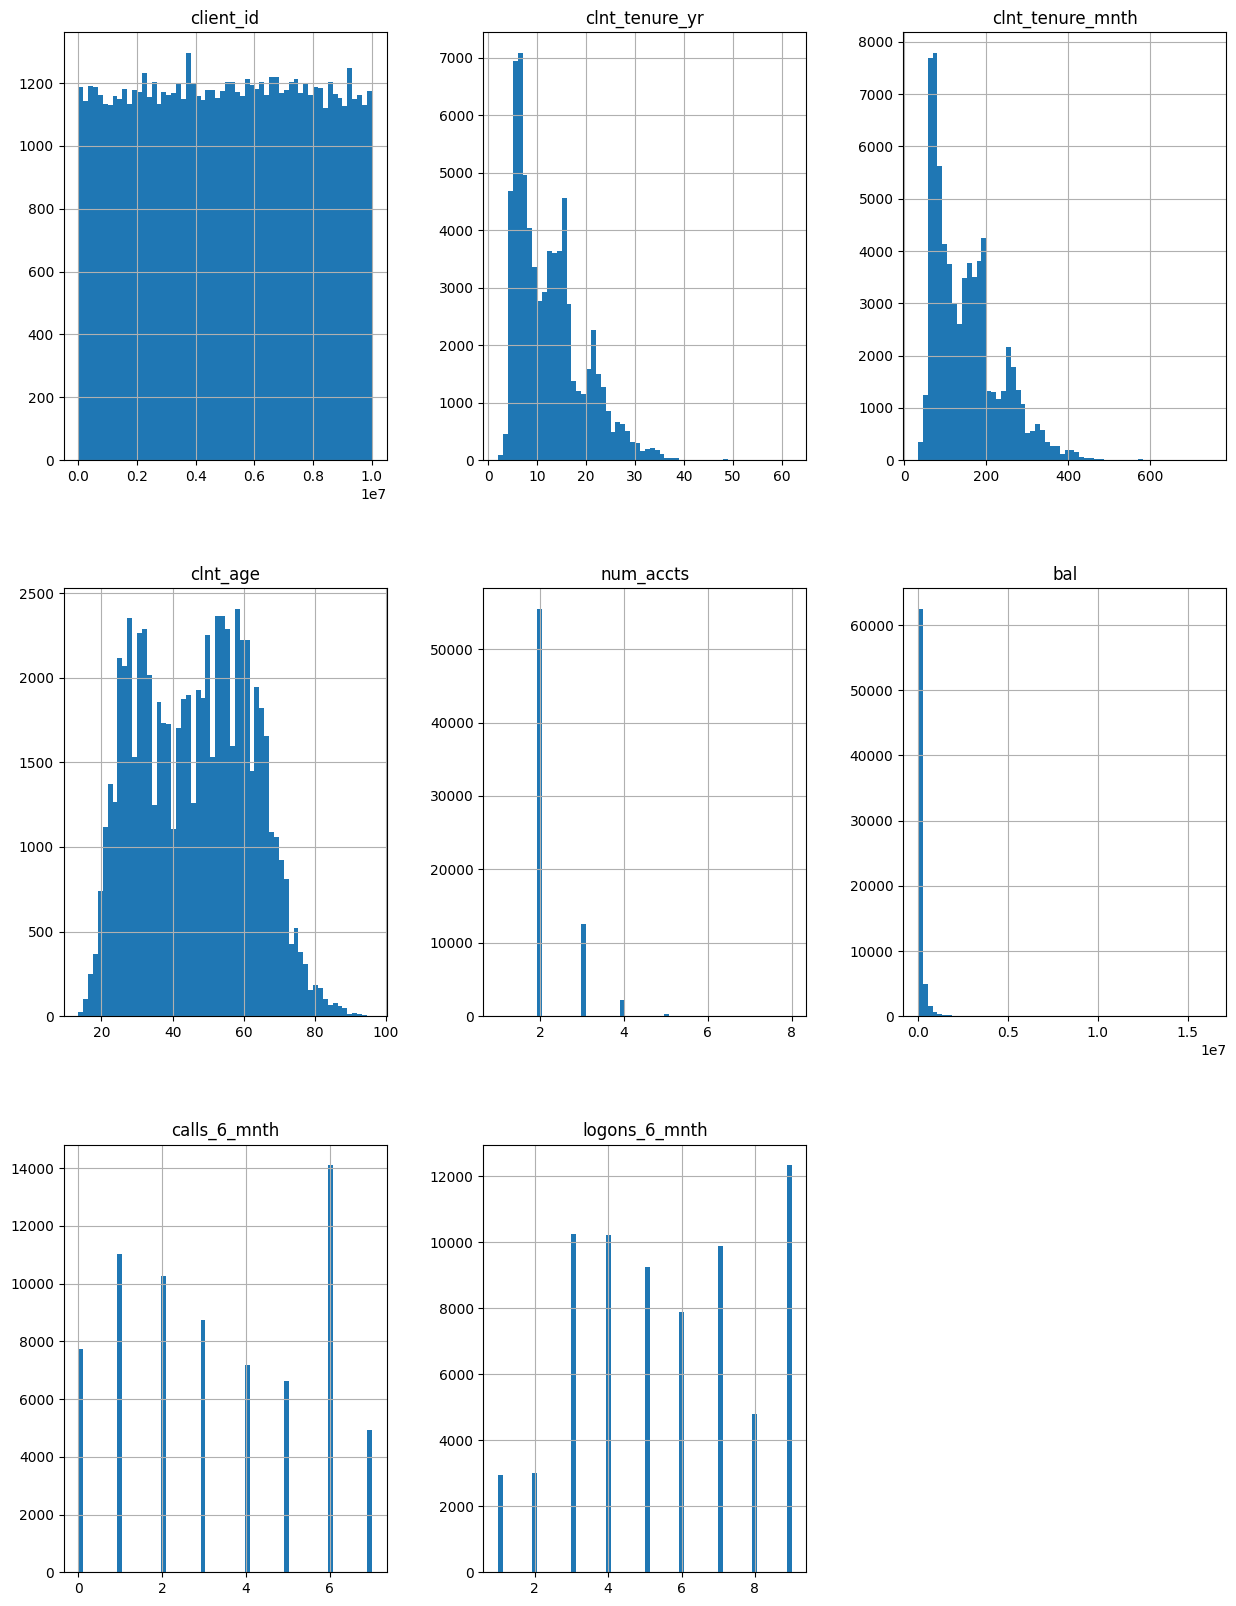

In [4]:
clients_merged.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
clients_merged.to_csv('clients_merged.csv', sep=',', index=False)

In [5]:
#webdata['process_step'].value_counts()
#webdata_confirm = webdata[webdata['process_step'] == 'confirm']
#merged_confirm = pd.merge(clients_merged, webdata_confirm, on='client_id')
#merged_confirm['Variation'].value_counts()

In [6]:
merged_total = pd.merge(clients_merged, webdata, on='client_id')


merged_total['Result'] = merged_total.groupby('client_id')['process_step'].transform(lambda x: 1 if 'confirm' in x.values else 0)
merged_total

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,Result
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,1
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,1
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,1
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,1
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,1
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,1
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,1
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,1


In [24]:
unique_client = merged_total.drop_duplicates(subset='client_id')
unique_client
unique_client.to_csv('unique_client.csv', sep=',', index=False)

In [8]:
crosstab_result = pd.crosstab(unique_client['Variation'], unique_client['Result'])

crosstab_result

Result,0,1
Variation,,
Control,8098,15434
Test,8281,18687


In [9]:

from scipy.stats import chi2_contingency

_, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_p_value.round()

0.0

In [10]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.039491069824472355

<Axes: xlabel='Variation'>

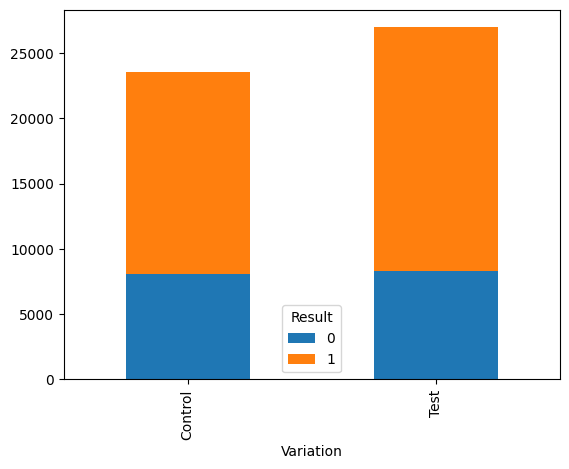

In [11]:
crosstab_result.plot(kind="bar", stacked=True)

<Axes: xlabel='Result', ylabel='Variation'>

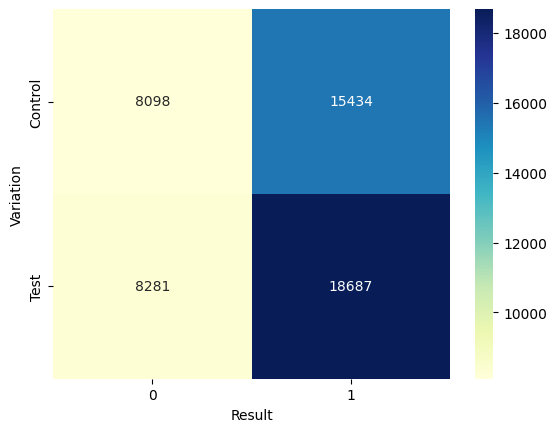

In [12]:
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

In [13]:
#Hypothesis testing

#Set the hypothesis

#H0: mu_test_result = mu_control_result
#H1: mu_test_result != mu_control_result

#significance level = 0.05

mu_test_result = unique_client[unique_client["Variation"]=="Test"]['Result']
mu_control_result = unique_client[unique_client["Variation"]=="Control"]['Result']
st.ttest_ind(mu_test_result, mu_control_result, equal_var=False)

# p value is less than 0.05, therefore we reject the H0 and accept H1 that Test results do not equal to Control results

TtestResult(statistic=8.863468067325087, pvalue=8.009768670783661e-19, df=49147.69981987177)

In [14]:
#Hypothesis testing that confirmation rate of test group is more than 5% 
#higher than the confirmation rate of the control group

#Set the hypothesis

#H0: mu_test_result <= x
#H1: mu_test_result > x

#significance level = 0.05

#mean of a control group
mean = unique_client[unique_client["Variation"]=="Control"]['Result'].mean()
#mean of a control group +5%
x = mean*1.05
x

mu_test_result = unique_client[unique_client["Variation"]=="Test"]['Result']
st.ttest_1samp(mu_test_result, x, alternative = "greater")

#very close, but more than 0.05 so not statistically significant. 

TtestResult(statistic=1.5186624116892327, pvalue=0.06442960779808811, df=26967)

In [15]:
merged_total['date_time'] = pd.to_datetime(merged_total['date_time'])
merged_total = merged_total.sort_values(by= ['date_time', 'visit_id'])
merged_total['time_diff'] = merged_total.groupby('visit_id')['date_time'].diff().dt.total_seconds().div(60).fillna(0)
time_spend_var = merged_total.groupby(['Variation','process_step'])['time_diff'].mean().reset_index()
display(time_spend_var)

,Variation,process_step,time_diff
0,Control,confirm,2.050820
1,Control,start,0.911990
2,Control,step_1,0.709761
3,Control,step_2,0.641626
4,Control,step_3,1.537314
5,Test,confirm,1.865846
6,Test,start,1.033265
7,Test,step_1,0.622843
8,Test,step_2,0.797767
9,Test,step_3,1.597476


<Axes: xlabel='process_step', ylabel='time_diff'>

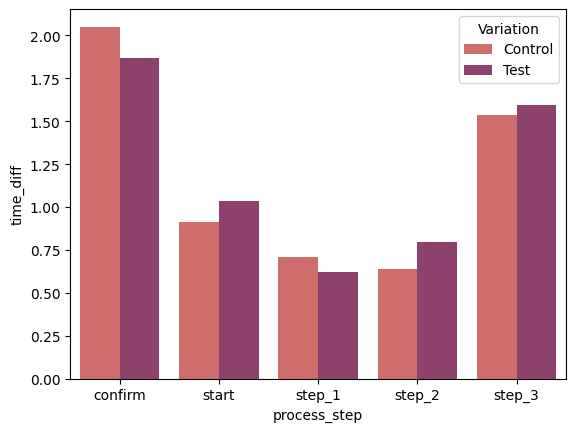

In [16]:
sns.barplot(data=time_spend_var, x='process_step', y='time_diff', hue='Variation', palette='flare')

In [31]:
merged_total = merged_total.sort_values(by=['date_time', 'visit_id'])

#adding a column tranforming steps to numbers
step_mapping = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}
merged_total['process_num'] = merged_total['process_step'].map(step_mapping).fillna(np.nan)

# Detect errors (the steps where the customer went back)
merged_total['prev_step'] = merged_total.groupby('visit_id')['process_num'].shift(1)
merged_total['reversion'] = merged_total['process_num'] < merged_total['prev_step']
merged_total['is_error'] = merged_total.groupby('visit_id')['reversion'].shift(-1)


# Calculate error rates
erreur_per_step = merged_total.groupby(['Variation','process_step'])['is_error'].sum()
total_transitions = merged_total.groupby(['Variation','process_step'])['is_error'].size()
error_rate_per_step = erreur_per_step / total_transitions

# Create a DataFrame to display error rates
error_rates_df = pd.DataFrame({
    'Errors': erreur_per_step,
    'Transitions': total_transitions,
    'Error Rate': error_rate_per_step
})

print(error_rates_df)

merged_total.head(20)

                       Errors  Transitions Error Rate
Variation process_step                               
Control   confirm         831        17505   0.047472
          start             0        47608        0.0
          step_1         2502        29668   0.084333
          step_2         2167        25886   0.083713
          step_3         4252        22795   0.186532
Test      confirm         472        25722    0.01835
          start             0        56474        0.0
          step_1         6408        38768   0.165291
          step_2         4785        30989    0.15441
          step_3         4753        25894   0.183556


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,visit_id,process_step,date_time,Result,time_diff,process_num,prev_step,reversion,is_error,last_step
410021,9088444,13.0,162.0,31.0,F,2.0,39636.14,6.0,6.0,NaN,...,423038079_46067236368_400417,step_3,2017-03-15 00:03:03,1,0.000000,3,NaN,False,NaN,3.0
315552,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,start,2017-03-15 00:19:28,1,0.000000,0,NaN,False,False,NaN
315551,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,1,1.366667,1,0.0,False,False,NaN
315550,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,1,2.033333,2,1.0,False,False,NaN
315549,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,1,0.916667,3,2.0,False,False,NaN
315548,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,1,2.616667,4,3.0,False,NaN,4.0
66111,4192640,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0,Test,...,706721307_85347845958_18583,start,2017-03-15 00:43:23,0,0.000000,0,NaN,False,False,NaN
66110,4192640,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0,Test,...,706721307_85347845958_18583,step_1,2017-03-15 00:43:32,0,0.150000,1,0.0,False,False,NaN
66109,4192640,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0,Test,...,706721307_85347845958_18583,step_2,2017-03-15 00:43:48,0,0.266667,2,1.0,False,True,NaN
66108,4192640,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0,Test,...,706721307_85347845958_18583,step_1,2017-03-15 00:44:36,0,0.800000,1,2.0,True,True,NaN


In [28]:
total_visit = merged_total.groupby('Variation')['client_id'].nunique()
visit_step = merged_total.groupby(['Variation','process_step'])['client_id'].nunique().reset_index()
visit_step['completion_rate'] = visit_step.apply(lambda row: row['client_id'] / total_visit[row['Variation']], axis=1)
visit_step

,Variation,process_step,client_id,completion_rate
0,Control,confirm,15434,0.655873
1,Control,start,23397,0.994263
2,Control,step_1,20152,0.856366
3,Control,step_2,18650,0.792538
4,Control,step_3,17422,0.740354
5,Test,confirm,18687,0.692932
6,Test,start,26679,0.989284
7,Test,step_1,24267,0.899844
8,Test,step_2,22258,0.825349
9,Test,step_3,20881,0.774288


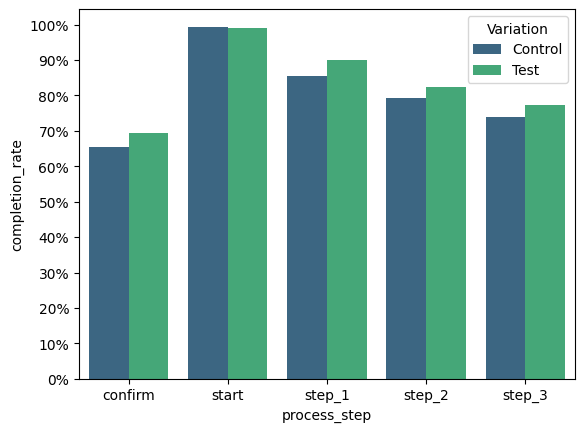

In [19]:
sns.barplot(data=visit_step, x='process_step', y='completion_rate', hue='Variation', palette='viridis')
plt.yticks([i/10 for i in range(11)], [f"{i*10}%" for i in range(11)])
plt.show()

In [25]:
merged_total = merged_total.sort_values(by=['date_time', 'visit_id'])

#adding a column tranforming steps to numbers
step_mapping = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}
merged_total['process_num'] = merged_total['process_step'].map(step_mapping).fillna(np.nan)

# 
merged_total['last_step'] = merged_total.groupby(['visit_id'])['process_num'].transform(lambda x: x.tail(1))

#merged_total.head(30)
pd.crosstab(merged_total['Variation'], merged_total['last_step'])

last_step,0.0,1.0,2.0,3.0,4.0
Variation,,,,,
Control,9636,3489,1457,2248,15261
Test,9444,3134,1324,1781,21340


In [21]:
#Hypothesis testing 2

# Set the hypothesis
# H0: mu_test_bal = mu_control_bal  (test clients balance equals to control clients balance) 
# H1: mu_test_bal != mu_control_bal (test clients balance does not equal to control clients balance) 

#significance level = 0.05

#dropping the nulls for the Balance column
unique_client = unique_client.dropna(subset=['bal'])

mu_test_bal = unique_client[unique_client["Variation"]=="Test"]['bal']
mu_control_bal = unique_client[unique_client["Variation"]=="Control"]['bal']

st.ttest_ind(mu_test_bal, mu_control_bal, equal_var=False)

# p-value is 0.66
#We fail to reject H0, therefore there is not enough evidence 
#to support a difference in balances between test and control clients

TtestResult(statistic=-0.4408016747156503, pvalue=0.6593584865878537, df=50005.734068548256)

In [22]:
#Hypothesis testing 3

#Set the hypothesis - test clients have logged on more frequently than control group in the last 6 months

#H0: mu_test_log >= mu_control_log
#H1: mu_test_log < mu_control_log

#significance level = 0.05

#dropping the nulls for the Balance column
unique_client = unique_client.dropna(subset=['logons_6_mnth'])

mu_test_log = unique_client[unique_client["Variation"]=="Test"]['logons_6_mnth']
mu_control_log = unique_client[unique_client["Variation"]=="Control"]['logons_6_mnth']

st.ttest_ind(mu_test_log, mu_control_log, equal_var=False, alternative = 'less')

# p-value is less than 0.05

#We reject H0, therefore we accept H1 that test clients have logged on 
#less frequently than control group in the last 6 months

TtestResult(statistic=-3.3202820413665446, pvalue=0.00044995700309300227, df=49589.35049515149)

In [23]:
mu_test_log.mean(),mu_control_log.mean()

(6.101850821557064, 6.166277043396948)

In [27]:
merged_total.to_csv('merged_total.csv', sep=',', index=False)
merged_total

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,visit_id,process_step,date_time,Result,time_diff,process_num,prev_step,reversion,is_error,last_step
410021,9088444,13.0,162.0,31.0,F,2.0,39636.14,6.0,6.0,NaN,...,423038079_46067236368_400417,step_3,2017-03-15 00:03:03,1,0.000000,3,NaN,False,NaN,3.0
315552,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,start,2017-03-15 00:19:28,1,0.000000,0,NaN,False,False,NaN
315551,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,1,1.366667,1,0.0,False,False,NaN
315550,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,1,2.033333,2,1.0,False,False,NaN
315549,7179755,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0,Control,...,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,1,0.916667,3,2.0,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331754,8295888,6.0,81.0,48.0,U,3.0,89987.63,7.0,7.0,NaN,...,540045810_7898209765_29471,step_3,2017-06-20 23:44:00,1,0.750000,3,2.0,False,False,NaN
331753,8295888,6.0,81.0,48.0,U,3.0,89987.63,7.0,7.0,NaN,...,540045810_7898209765_29471,confirm,2017-06-20 23:44:20,1,0.333333,4,3.0,False,NaN,4.0
118359,6187864,13.0,163.0,55.0,F,2.0,174412.75,4.0,7.0,Control,...,77393632_6804608909_354572,start,2017-06-20 23:56:17,0,0.000000,0,NaN,False,False,NaN
118358,6187864,13.0,163.0,55.0,F,2.0,174412.75,4.0,7.0,Control,...,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,0,0.216667,1,0.0,False,False,NaN
